In [1]:
import pandas as pd
from glob import glob
import random
import Stemmer
import emoji
import re
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from num2words import num2words

random.seed(20)

In [2]:
appos = {
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "how's" : "how is",
    "i'd" : "i would",
    "i'll" : "i will",
    "i'm" : "i am",
    "i've" : "i have",
    "isn't" : "is not",
    "it's" : "it is",
    "let's" : "let us",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "wasn't" : "was not",
    "we'd" : "we would",
    "we'll" : "we will",
    "we're" : "we are",
    "we've" : "we have",
    "weren't" : "were not",
    "what's" : "what is",
    "where's" : "where is",
    "who's" : "who is",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "y'all" : "you all",
}

stop_words = {
    "i", "a", "an", "the", "in", "on", "at", "to", 
    "and", "or", "but", "is", "am", "are", "was", 
    "it", "they", "this", "of", "for", "with", 
    "as", "by", "from", "that", "those", "these",
    
    "he", "she", "we", "you", "me", "him", "her", 
    "us", "them", "my", "your", "our", "their", 
    "do", "does", "did", "have", "has", "had", 
    "about", "above", "across", "after", "against", 
    "along", "among", "around", "behind", "below", 
    "beneath", "beside", "between", "beyond", 
    "despite", "during", "except", "into", "near", 
    "off", "over", "past", "through", "toward", 
    "under", "until", "up", "upon", "via", "within", 
    "without", "although", "because", "since", 
    "unless", "while", "where", "whether", "any", 
    "each", "every", "either", "neither", "some", 
    "such", "both", "few", "many", "several", "all", 
    "other", "same", "so", "too","when"
}

negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "nowhere",
    "neither", "nor", "without", "cannot", "can't", "couldn't",
    "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't",
    "isn't", "mightn't", "mustn't", "needn't", "oughtn't", "shan't",
    "shouldn't", "wasn't", "weren't", "won't", "wouldn't", "rarely",
    "scarcely", "hardly", "barely", "little", "few", "lack", "lacking",
    "deny", "denies", "denied", "denying", "refuse", "refuses",
    "refused", "refusing", "reject", "rejects", "rejected", "rejecting"
}

positive_words = {
    "good", "great", "excellent", "awesome", "amazing", "wonderful",
    "fantastic", "perfect", "outstanding", "superb", "brilliant", "fabulous",
    "terrific", "incredible", "lovely", "delightful", "joyful", "happy",
    "joy", "bliss", "ecstatic", "pleasure", "vibrant", "optimistic",
    "positive", "success", "victory", "triumph", "peace", "harmony",
    "gratitude", "thankful", "blessed", "lucky", "prosperous", "rewarding",
    "satisfying", "refreshing", "inspiring", "motivating", "encouraging",
    "kind", "generous", "compassionate", "honest", "trustworthy", "loyal",
    "creative", "innovative", "energetic", "vital", "healthy", "strong",
    "courageous", "bold", "confident", "resilient", "graceful", "elegant",
    "charming", "friendly", "welcoming", "supportive", "helpful", "heavenly",
    "divine", "magical", "serene", "calm", "relaxed", "bright", "shining",
    "glowing", "sparkling", "clean", "pure", "fresh", "new", "exciting",
    "thrilling", "adventurous", "fun", "playful", "humorous", "lighthearted",
    "smiling", "laughing", "cheerful", "jubilant", "celebratory", "festive",
    "colorful", "beautiful", "stunning", "gorgeous", "radiant", "dazzling",
    "admire", "cherish", "treasure", "love", "adore", "passion", "devotion","smilingfacewithhearteyes"
}

negative_words = {
    "bad", "terrible", "awful", "horrible", "worst", "disgusting",
    "hate", "loathe", "despise", "abhor", "ugly", "painful",
    "sad", "unhappy", "miserable", "depressed", "gloomy", "sorrow",
    "failure", "disaster", "mess", "broken", "damaged", "defective",
    "angry", "furious", "enraged", "annoyed", "irritated", "frustrated",
    "evil", "wicked", "cruel", "mean", "selfish", "greedy", "corrupt",
    "harmful", "dangerous", "toxic", "poisonous", "deadly", "violent",
    "stupid", "idiotic", "foolish", "ridiculous", "nonsense", "absurd",
    "boring", "dull", "tedious", "monotonous", "lame", "uninteresting",
    "weak", "frail", "feeble", "helpless", "hopeless", "useless",
    "scary", "frightening", "terrifying", "horrifying", "creepy",
    "lonely", "isolated", "abandoned", "rejected", "betrayed", "ignored",
    "stress", "anxiety", "fear", "panic", "dread", "worry",
    "disappointment", "regret", "shame", "guilt", "embarrassment", "humiliation",
    "problem", "issue", "mistake", "error", "flaw", "defect",
    "conflict", "fight", "argument", "quarrel", "dispute", "war",
    "polluted", "dirty", "filthy", "rotten", "decaying", "waste",
    "fake", "fraud", "lie", "cheat", "deceive", "manipulate",
    "sick", "ill", "pain", "ache", "suffering", "agony",
    "loss", "defeat", "collapse", "crash", "bankrupt", "ruin"
}

positive_emojis = {
    ":grinning_face:", ":beaming_face_with_smiling_eyes:", ":grinning_face_with_sweat:",
    ":rolling_on_the_floor_laughing:", ":face_with_tears_of_joy:", ":smiling_face:",
    ":smiling_face_with_halo:", ":smiling_face_with_hearts:", ":smiling_face_with_heart-eyes:",
    ":star-struck:", ":kissing_face:", ":kissing_face_with_closed_eyes:",
    ":kissing_face_with_smiling_eyes:", ":heart_eyes:", ":face_blowing_a_kiss:",
    ":hugging_face:", ":thumbs_up:", ":clapping_hands:", ":folded_hands:", ":handshake:",
    ":sparkles:", ":fire:", ":rocket:", ":party_popper:", ":confetti_ball:", ":tada:",
    ":balloon:", ":red_heart:", ":orange_heart:", ":yellow_heart:", ":green_heart:",
    ":blue_heart:", ":purple_heart:", ":sparkling_heart:", ":heart_with_arrow:",
    ":revolving_hearts:", ":two_hearts:", ":growing_heart:", ":heartpulse:",
    ":star:", ":glowing_star:", ":sun:", ":sun_with_face:", ":rainbow:", ":flower_playing_cards:",
    ":cherry_blossom:", ":rose:", ":hibiscus:", ":sunflower:", ":tulip:", ":bouquet:",
    ":palm_tree:", ":christmas_tree:", ":four_leaf_clover:", ":shamrock:", ":maple_leaf:",
    ":fallen_leaf:", ":herb:", ":potted_plant:", ":seedling:", ":crown:", ":trophy:",
    ":medal:", ":musical_notes:", ":musical_note:", ":party_face:", ":dancer:", ":man_dancing:",
    ":woman_dancing:", ":man_in_tuxedo:", ":princess:", ":superhero:", ":rocket:", ":airplane:",
    ":checkered_flag:", ":trophy:", ":1st_place_medal:", ":money_with_wings:", ":dollar_banknote:",
    ":money_bag:", ":gem_stone:", ":ring:", ":gift:", ":birthday_cake:", ":champagne:",
    ":clinking_glasses:", ":beers:", ":chocolate_bar:", ":ice_cream:", ":doughnut:",
    ":cookie:", ":cake:", ":pizza:", ":hamburger:", ":taco:", ":burrito:", ":sushi:",
    ":ramen:", ":spaghetti:", ":wine_glass:", ":hot_beverage:", ":teacup_without_handle:",
    ":beer_mug:", ":clinking_beer_mugs:", ":champagne_glass:", ":dog_face:", ":cat_face:",
    ":panda_face:", ":koala:", ":unicorn_face:", ":dragon_face:", ":dove:", ":butterfly:",
    ":rainbow_flag:", ":peace_symbol:", ":infinity:", ":recycling_symbol:", ":white_flower:",
}

negative_emojis = {
    ":angry_face:", ":pouting_face:", ":face_with_symbols_on_mouth:", ":smiling_face_with_horns:",
    ":angry_face_with_horns:", ":skull:", ":skull_and_crossbones:", ":crying_face:",
    ":loudly_crying_face:", ":worried_face:", ":slightly_frowning_face:", ":confounded_face:",
    ":disappointed_face:", ":downcast_face:", ":face_with_steam_from_nose:", ":face_screaming_in_fear:",
    ":fearful_face:", ":anxious_face_with_sweat:", ":sad_but_relieved_face:", ":sleepy_face:",
    ":tired_face:", ":yawning_face:", ":face_with_medical_mask:", ":nauseated_face:",
    ":face_vomiting:", ":sneezing_face:", ":cold_face:", ":hot_face:", ":dizzy_face:",
    ":exploding_head:", ":face_with_head-bandage:", ":broken_heart:", ":black_heart:",
    ":thumbs_down:", ":middle_finger:", ":raised_fist:", ":oncoming_fist:", ":collision:",
    ":bomb:", ":fire:", ":dagger:", ":pistol:", ":stop_sign:", ":no_entry:", ":prohibited:",
    ":warning:", ":radioactive:", ":biohazard:", ":anger_symbol:", ":hole:", ":pile_of_poo:",
    ":zombie:", ":ghost:", ":japanese_goblin:", ":japanese_ogre:", ":clown_face:",
    ":crying_cat_face:", ":pouting_cat_face:", ":see-no-evil_monkey:", ":hear-no-evil_monkey:",
    ":speak-no-evil_monkey:", ":footprints:", ":spider:", ":spider_web:", ":snake:", ":rat:",
    ":scorpion:", ":mosquito:", ":microbe:", ":coffin:", ":funeral_urn:", ":stopwatch:",
    ":hourglass_done:", ":hourglass_not_done:", ":cigarette:", ":no_smoking:", ":cactus:",
    ":wilted_flower:", ":volcano:", ":earthquake:", ":tornado:", ":cloud_with_lightning_and_rain:",
    ":droplet:", ":sweat_droplets:", ":dashing_away:", ":dizzy:", ":face_with_thermometer:",
    ":sick:", ":bandage:", ":syringe:", ":pill:", ":test_tube:", ":magnifying_glass_tilted_left:",
    ":chains:", ":handcuffs:", ":locked:", ":locked_with_key:", ":locked_with_pen:"
}

# Create Load Data Class
The `DataLoader` class is designed to load text data from a directory structure, where each subdirectory corresponds to a specific label (e.g., sentiment categories like "pos", "neg"). The class provides functionality to read text files, associate them with their respective labels, and optionally shuffle the data before returning it as a Pandas DataFrame.

## Class Overview

### Parameters:
- **`path`** (`str`):  
  The root directory path where the labeled text files are stored. Each label should have its own subdirectory under this path.
  
- **`labels`** (`list[str]`):  
  A list of label names corresponding to the subdirectories under the root path. Each label represents a category (e.g., "positive", "negative").
  
- **`shuffle`** (`bool`, optional):  
  If `True`, the loaded data will be shuffled randomly before being returned. Default is `True`.

### Methods:
- **`load_data()`**:  
  Reads all `.txt` files from the specified subdirectories, associates each file's content with its corresponding label, and returns the data as a Pandas DataFrame.  
  - **Returns**:  
    A Pandas DataFrame with two columns:  
    - `text`: The content of the text file.  
    - `sentiment_label`: The label associated with the text.

In [3]:
class DataLoder:
    def __init__(self,path:str,labels:list[str],shuffle:bool=True):
        self.path = path
        self.labels = labels
        self.shuffle = shuffle
    
    def load_data(self)->pd.DataFrame:
        data=[]
        for label in self.labels:
            for filename in glob(f"{self.path}/{label}/*.txt"):
                with open(filename, "r", encoding="utf-8") as file:
                    text = file.read()
                    data.append({"text":text,"sentiment_label":label})
        if self.shuffle:
            random.shuffle(data)
        df = pd.DataFrame(data)
        return df

In [4]:
data_load=DataLoder("data/training_data",labels=["neg","pos"],shuffle=True)
sentiment_data=data_load.load_data()
sentiment_data.head(5)

,text,sentiment_label
0,originally entitled dancing about architecture...,pos
1,""" an intimate , character-driven drama about ...",neg
2,the only two really good things that i can say...,neg
3,denzel washington is among the many actors thi...,pos
4,"rated : r for strong language , sexual dialogu...",pos


# Create Preprocessing Classes

# Abstract Classes: `FeaturesExtractor` and `Preprocessing`

This documentation provides an overview of two abstract base classes (`ABC`) designed to serve as blueprints for feature extraction and text preprocessing tasks. These classes enforce a consistent interface for derived classes by defining abstract methods that must be implemented.

---

## FeaturesExtractor Class

The `FeaturesExtractor` class is an abstract base class that defines the interface for extracting features from text data. It ensures that any subclass implements the `transform` method.

### Abstract Method:
- **`transform(self, text: str)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for transforming raw text into features (e.g., numerical representations, embeddings, etc.).  
  - **Parameters**:  
    - `text` (`str`): The input text to be transformed.  
  - **Returns**:  
    The method's return type is not explicitly defined here, as it depends on the specific implementation in the subclass.

## Preprocessing Class

The `Preprocessing` class is an abstract base class that defines the interface for text preprocessing tasks. It ensures that any subclass implements the `transform` method, which applies specific preprocessing steps to raw text.

### Abstract Method:
- **`transform(self, text: str) -> str`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for applying preprocessing steps to raw text (e.g., lowercasing, tokenization, stopword removal, etc.).  
  - **Parameters**:  
    - `text` (`str`): The input text to be preprocessed.  
  - **Returns**:  
    The preprocessed text as a string (`str`).

In [5]:
class FeaturesExtractor(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

class Preprocessing(ABC):
    @abstractmethod
    def transform(self,text:str)->str:
        pass

# Feature Extractor Classes

This documentation provides an overview of several feature extractor classes that inherit from the `FeaturesExtractor` abstract base class. Each class implements the `transform` method to extract specific features from text data. These features can be used for tasks such as sentiment analysis, text classification, or other natural language processing (NLP) applications.

---

## NegationCount

The `NegationCount` class counts the number of negation words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Converts the text to lowercase, splits it into tokens, and counts the occurrences of predefined negation words (`negation_words`).  
  - **Returns**:  
    A dictionary with the key `"neg_word_count"` and the count of negation words as the value.

---

## IngCount

The `IngCount` class counts the number of words ending with "ing" in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and counts the words that end with "ing".  
  - **Returns**:  
    A dictionary with the key `"ing_word_count"` and the count of "ing" words as the value.

---

## EdCount

The `EdCount` class counts the number of words ending with "ed" in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and counts the words that end with "ed".  
  - **Returns**:  
    A dictionary with the key `"ed_word_count"` and the count of "ed" words as the value.

---

## PositiveWordCount

The `PositiveWordCount` class counts the number of positive words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and counts the occurrences of predefined positive words (`positive_words`).  
  - **Returns**:  
    A dictionary with the key `"positive_word_count"` and the count of positive words as the value.

---

## NegativeWordsCount

The `NegativeWordsCount` class counts the number of negative words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and counts the occurrences of predefined negative words (`negative_words`).  
  - **Returns**:  
    A dictionary with the key `"negative_word_count"` and the count of negative words as the value.

---

## PositiveEmojiCount

The `PositiveEmojiCount` class counts the number of positive emojis in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Converts emojis in the text to their textual representation, splits it into tokens, and counts the occurrences of predefined positive emojis (`positive_emojis`).  
  - **Returns**:  
    A dictionary with the key `"positive_emoji_count"` and the count of positive emojis as the value.

---

## NegativeEmojiCount

The `NegativeEmojiCount` class counts the number of negative emojis in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Converts emojis in the text to their textual representation, splits it into tokens, and counts the occurrences of predefined negative emojis (`negative_emojis`).  
  - **Returns**:  
    A dictionary with the key `"negative_emoji_count"` and the count of negative emojis as the value.

---

## WordCount

The `WordCount` class counts the total number of words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and counts the total number of words.  
  - **Returns**:  
    A dictionary with the key `"word_count"` and the total word count as the value.

---

## AverageWordLength

The `AverageWordLength` class calculates the average length of words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and calculates the average length of the words.  
  - **Returns**:  
    A dictionary with the key `"avg_word_length"` and the average word length as the value.

---

## UniqueWordRatio

The `UniqueWordRatio` class calculates the ratio of unique words to the total number of words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, splits it into tokens, and calculates the ratio of unique words to the total word count.  
  - **Returns**:  
    A dictionary with the key `"unique_word_ratio"` and the ratio as the value.

---

## ExclamationCount

The `ExclamationCount` class counts the number of exclamation marks (`!`) in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Counts the occurrences of the exclamation mark (`!`) in the text.  
  - **Returns**:  
    A dictionary with the key `"exclamation_count"` and the count of exclamation marks as the value.

---

## QuestionCount

The `QuestionCount` class counts the number of question marks (`?`) in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Counts the occurrences of the question mark (`?`) in the text.  
  - **Returns**:  
    A dictionary with the key `"question_count"` and the count of question marks as the value.

---

## EllipsisCount

The `EllipsisCount` class counts the number of ellipses (`...`) in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Uses a regular expression to find all occurrences of ellipses (`...`) in the text.  
  - **Returns**:  
    A dictionary with the key `"ellipsis_count"` and the count of ellipses as the value.

---

## CapitalizedRatio

The `CapitalizedRatio` class calculates the ratio of fully capitalized words to the total number of words in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Splits the text into tokens, identifies fully capitalized words (excluding single-character words), and calculates the ratio of capitalized words to the total word count.  
  - **Returns**:  
    A dictionary with the key `"capitalized_ratio"` and the ratio as the value.

---

## RepeatedLettersCount

The `RepeatedLettersCount` class counts the number of words with repeated letters in the input text.

### Method:
- **`transform(self, text: str)`**:  
  Removes special characters from the text, uses a regular expression to find words with repeated letters, and counts them.  
  - **Returns**:  
    A dictionary with the key `"repeated_letters_count"` and the count of words with repeated letters as the value.

---

In [6]:
class NegationCount(FeaturesExtractor):
    def transform(self,text:str):
        text=text.lower()
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negation_words:
                counter+=1
        return {
            "neg_word_count":counter
        }

class IngCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ing"):
                counter+=1
        return {"ing_word_count":counter}

class EdCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.endswith("ed"):
                counter+=1
        return {"ed_word_count":counter}

class PositiveWordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in positive_words:
                counter+=1
        return {"positive_word_count":counter}
            
class NegativeWordsCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token in negative_words:
                counter+=1
        return {"negative_word_count":counter}

class PositiveEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in positive_emojis:
                counter+=1
        return {"positive_emoji_count":counter}

class NegativeEmojiCount(FeaturesExtractor):
    def transform(self,text:str):
        text=ConvertEmoji().transform(text)
        tokens=text.split()
        counter=0
        for token in tokens:
            if token.startswith(":") and token.endswith(":") and token in negative_emojis:
                counter+=1
        return {"negative_emoji_count":counter}

class WordCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        return {"word_count":len(tokens)}

class AverageWordLength(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        tokens_size=len(tokens)
        word_sum=0
        for token in tokens:
            word_sum+=len(token)
        avg=word_sum/tokens_size
        return {"avg_word_length":avg}

class UniqueWordRatio(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        tokens=text.split()
        word_size=len(tokens)
        unique_word_size=len(set(tokens))
        ratio=unique_word_size/word_size if word_size > 0 else 0
        return {"unique_word_ratio":ratio}

class ExclamationCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"exclamation_count":text.count("!")}

class QuestionCount(FeaturesExtractor):
    def transform(self,text:str):
        return {"question_count":text.count("?")}

class EllipsisCount(FeaturesExtractor):
    def transform(self,text:str):
        ellipsis_count = len(re.findall(r"\.\.\.", text))
        return {"ellipsis_count":ellipsis_count}
    
class CapitalizedRatio(FeaturesExtractor):
    def transform(self,text:str):
        tokens=text.split()
        word_size=len(tokens)
        capitalized_words = [word for word in tokens if word.isupper() and len(word) > 1]
        ratio = len(capitalized_words)/word_size if word_size > 0 else 0
        return {"capitalized_ratio":ratio}
    
class RepeatedLettersCount(FeaturesExtractor):
    def transform(self,text:str):
        text=RemoveSpecialCharacters().transform(text)
        repeated_letters = re.findall(r'(\w)\1{2,}', text)
        return {"repeated_letters_count":len(repeated_letters)}

# Preprocessing Classes

This documentation provides an overview of several preprocessing classes that inherit from the `Preprocessing` abstract base class. Each class implements the `transform` method to apply specific preprocessing steps to text data. These preprocessing steps are commonly used in natural language processing (NLP) pipelines to clean and prepare text for further analysis or modeling.

---

## RemoveSpecialCharacters

The `RemoveSpecialCharacters` class removes special characters from the input text while retaining alphanumeric characters, apostrophes, and spaces.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase, removes all characters except alphanumeric characters, apostrophes, and spaces, and replaces multiple spaces with a single space.  
  - **Returns**:  
    The preprocessed text as a string.

---

## ConvertEmoji

The `ConvertEmoji` class converts emojis in the input text into their textual representation.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase and uses the `emoji.demojize` function to replace emojis with their textual equivalents.  
  - **Returns**:  
    The preprocessed text with emojis converted to text.

---

## TextStemmer

The `TextStemmer` class applies stemming to the words in the input text.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase, splits it into tokens, and applies stemming using an English stemmer (`Stemmer.Stemmer`). The stemmed tokens are then joined back into a single string.  
  - **Returns**:  
    The preprocessed text with stemmed words.

---

## ConvertNumberToWords

The `ConvertNumberToWords` class converts numerical values in the input text into their word equivalents.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase and replaces all numerical values with their ordinal word equivalents using the `num2words` library.  
  - **Returns**:  
    The preprocessed text with numbers converted to words.

---

## NegationHandling

The `NegationHandling` class handles negations in the input text by replacing specific words with their negated forms.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase, splits it into tokens, and replaces words with their negated forms if they exist in a predefined dictionary (`appos`). The tokens are then joined back into a single string.  
  - **Returns**:  
    The preprocessed text with negations handled.

---

## RemoveStopWords

The `RemoveStopWords` class removes stopwords from the input text.

### Method:
- **`transform(self, text: str) -> str`**:  
  Converts the text to lowercase, splits it into tokens, and removes tokens that are present in a predefined list of stopwords (`stop_words`). The remaining tokens are joined back into a single string.  
  - **Returns**:  
    The preprocessed text with stopwords removed.

In [7]:
class RemoveSpecialCharacters(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        process_text = re.sub(r"[^a-zA-Z0-9'\s]", '', text)
        process_text = re.sub(r"\s+", " ", process_text)
        return process_text

class ConvertEmoji(Preprocessing):    
    def transform(self,text:str)->str:
        text=text.lower()
        converted_text = emoji.demojize(text)
        return converted_text

class TextStemmer(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        stemmer=Stemmer.Stemmer("english")
        tokens=[stemmer.stemWord(token) for token in tokens]
        return ' '.join(tokens)
    
class ConvertNumberToWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        def replace_match(match):
            return num2words(int(match.group(0)), to='ordinal')
        return re.sub(r'-?\d+',replace_match,text)
        
class NegationHandling(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[appos[word] if word in appos else word for word in tokens]
        return ' '.join(tokens)

class RemoveStopWords(Preprocessing):
    def transform(self,text:str)->str:
        text=text.lower()
        tokens=text.split()
        tokens=[word for word in tokens if word not in stop_words]
        return ' '.join(tokens)

# Pipeline Class

The `Pipeline` class is an abstract base class that defines the interface for creating modular text processing pipelines. It ensures that any subclass implements the `transform` method, which applies a series of transformations or preprocessing steps to the input text.

---

## Overview

The `Pipeline` class is designed to standardize the process of applying multiple transformations to text data. By defining the `transform` method as an abstract method, it enforces that all subclasses implement their own version of the pipeline logic. This makes the class highly reusable and modular, allowing developers to create custom pipelines tailored to specific tasks.

---

## Abstract Method

- **`transform(self, text: str)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for applying a series of transformations or preprocessing steps to the input text.  
  - **Parameters**:  
    - `text` (`str`): The input text to be processed.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return preprocessed text, extracted features, or other transformed data.

In [8]:
class Pipeline(ABC):
    @abstractmethod
    def transform(self,text:str):
        pass

# PreprocessingPipeline Class

The `PreprocessingPipeline` class is a concrete implementation of the `Pipeline` abstract base class. It is designed to chain multiple preprocessing steps together, applying each step sequentially to the input text.

---

## Overview

The `PreprocessingPipeline` class allows you to define a sequence of preprocessing operations (e.g., removing special characters, converting emojis, stemming, etc.) and apply them in order to the input text. By leveraging the `Pipeline` interface, it ensures modularity and reusability in text preprocessing workflows.

---

## Constructor

- **`__init__(self, pipeline_list: list[Preprocessing])`**:  
  Initializes the `PreprocessingPipeline` with a list of preprocessing steps.  
  - **Parameters**:  
    - `pipeline_list` (`list[Preprocessing]`): A list of objects that inherit from the `Preprocessing` abstract base class. Each object represents a preprocessing step to be applied to the text.  

---

## Method

- **`transform(self, text: str)`**:  
  Applies each preprocessing step in the `pipeline_list` sequentially to the input text.  
  - **Parameters**:  
    - `text` (`str`): The input text to be preprocessed.  
  - **Returns**:  
    The fully preprocessed text as a string after applying all steps in the pipeline.

In [9]:
class PreprocessingPipeline(Pipeline):
    def __init__(self,pipeline_list:list[Preprocessing]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        for pipeline in self.pipeline_list:
            text = pipeline.transform(text)
        
        return text

# FeaturesExtractorPipeline Class

The `FeaturesExtractorPipeline` class is a concrete implementation of the `Pipeline` abstract base class. It is designed to chain multiple feature extraction steps together, applying each step sequentially to the input text and aggregating the extracted features into a single dictionary.

---

## Overview

The `FeaturesExtractorPipeline` class allows you to define a sequence of feature extraction operations (e.g., counting negation words, calculating word counts, or extracting emoji counts) and apply them in order to the input text. By leveraging the `Pipeline` interface, it ensures modularity and reusability in feature extraction workflows.

---

## Constructor

- **`__init__(self, pipeline_list: list[FeaturesExtractor])`**:  
  Initializes the `FeaturesExtractorPipeline` with a list of feature extraction steps.  
  - **Parameters**:  
    - `pipeline_list` (`list[FeaturesExtractor]`): A list of objects that inherit from the `FeaturesExtractor` abstract base class. Each object represents a feature extraction step to be applied to the text.  

---

## Method

- **`transform(self, text: str)`**:  
  Applies each feature extraction step in the `pipeline_list` sequentially to the input text. The results from each step are aggregated into a single dictionary.  
  - **Parameters**:  
    - `text` (`str`): The input text from which features are to be extracted.  
  - **Returns**:  
    A dictionary containing all the extracted features, where the keys are the feature names and the values are the corresponding feature values.

In [10]:
class FeaturesExtractorPipeline(Pipeline):
    def __init__(self,pipeline_list:list[FeaturesExtractor]):
        self.pipeline_list = pipeline_list
    
    def transform(self,text:str):
        dictionary ={}
        for pipeline in self.pipeline_list:
            dictionary.update(pipeline.transform(text))
        return dictionary            
            

In [11]:
string="100 I love this product! 😍 It's absolutely amazing. But the delivery? was slow... BUT 😠 sooooo"
preprocessing_pipeline=PreprocessingPipeline([
    NegationHandling(),
    TextStemmer(),
    ConvertEmoji(),
    RemoveSpecialCharacters(),
    ConvertNumberToWords(),
    RemoveStopWords()
])
features_extractor_pipeline=FeaturesExtractorPipeline([
    NegationCount(),
    IngCount(),
    EdCount(),
    PositiveWordCount(),
    NegativeWordsCount(),
    PositiveEmojiCount(),
    NegativeEmojiCount(),
    WordCount(),
    AverageWordLength(),
    UniqueWordRatio(),
    ExclamationCount(),
    QuestionCount(),
    EllipsisCount(),
    CapitalizedRatio(),
    RepeatedLettersCount(),
])
print(preprocessing_pipeline.transform(string))
print(features_extractor_pipeline.transform(string))

one hundredth love product smilingfacewithhearteyes absolut amazing delivery slow angryface sooooo
{'neg_word_count': 0, 'ing_word_count': 1, 'ed_word_count': 0, 'positive_word_count': 2, 'negative_word_count': 0, 'positive_emoji_count': 1, 'negative_emoji_count': 1, 'word_count': 15, 'avg_word_length': 4.666666666666667, 'unique_word_ratio': 0.9333333333333333, 'exclamation_count': 1, 'question_count': 1, 'ellipsis_count': 1, 'capitalized_ratio': 0.058823529411764705, 'repeated_letters_count': 1}


# Function: Extract and Join Features

The `extract_and_join_features` function is designed to extract features from text data using a `FeaturesExtractorPipeline` and join the extracted features with the original dataset (`sentiment_data`).


In [12]:
def extract_features(text:str):
    features=features_extractor_pipeline.transform(text)
    return features

expanded=sentiment_data["text"].apply(extract_features).apply(pd.Series)
sentiment_data=sentiment_data.join(expanded)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,originally entitled dancing about architecture...,pos,3.0,42.0,29.0,18.0,2.0,0.0,0.0,854.0,4.811475,0.489461,0.0,3.0,0.0,0.0,1.0
1,""" an intimate , character-driven drama about ...",neg,4.0,11.0,6.0,1.0,1.0,0.0,0.0,291.0,4.972509,0.714777,0.0,0.0,0.0,0.0,0.0
2,the only two really good things that i can say...,neg,12.0,19.0,16.0,2.0,8.0,0.0,0.0,491.0,4.364562,0.533605,0.0,3.0,0.0,0.0,0.0
3,denzel washington is among the many actors thi...,pos,16.0,27.0,24.0,8.0,11.0,0.0,0.0,883.0,4.660249,0.468856,0.0,0.0,0.0,0.0,0.0
4,"rated : r for strong language , sexual dialogu...",pos,19.0,19.0,12.0,17.0,3.0,0.0,0.0,994.0,4.193159,0.386318,3.0,0.0,0.0,0.0,2.0


# Function: Text Preprocessing

The `text_preprocessing` function is designed to preprocess text data using a `PreprocessingPipeline`. It applies a series of preprocessing steps (e.g., removing special characters, converting emojis, stemming, etc.) to each row of a specified text column in a DataFrame (`sentiment_data`). The preprocessed text replaces the original text in the DataFrame.


In [13]:
def text_preprocessing(text:str):
    preprocessed_text=preprocessing_pipeline.transform(text)
    return preprocessed_text

sentiment_data["text"]=sentiment_data["text"].apply(text_preprocessing)
sentiment_data.head(5)

,text,sentiment_label,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
0,origin entitl danc architectur e talk love lik...,pos,3.0,42.0,29.0,18.0,2.0,0.0,0.0,854.0,4.811475,0.489461,0.0,3.0,0.0,0.0,1.0
1,intim characterdriven drama troubl youth cross...,neg,4.0,11.0,6.0,1.0,1.0,0.0,0.0,291.0,4.972509,0.714777,0.0,0.0,0.0,0.0,0.0
2,onli two realli good thing can say tarzan lost...,neg,12.0,19.0,16.0,2.0,8.0,0.0,0.0,491.0,4.364562,0.533605,0.0,3.0,0.0,0.0,0.0
3,denzel washington mani actor holiday season gi...,pos,16.0,27.0,24.0,8.0,11.0,0.0,0.0,883.0,4.660249,0.468856,0.0,0.0,0.0,0.0,0.0
4,rate r strong languag sexual dialogu drug use ...,pos,19.0,19.0,12.0,17.0,3.0,0.0,0.0,994.0,4.193159,0.386318,3.0,0.0,0.0,0.0,2.0


In [14]:
from collections import Counter

def tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

all_words = [word for text in sentiment_data['text'] for word in tokenize(text)]

word_counts = Counter(all_words)

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('not', 9241),
 ('film', 9218),
 ('his', 7938),
 ('one', 6223),
 ('be', 6217),
 ('movi', 5740),
 ('who', 4696),
 ('like', 3272),
 ('there', 3162),
 ('charact', 3144),
 ('out', 2876),
 ('what', 2767),
 ('more', 2761),
 ('get', 2637),
 ('which', 2615),
 ('make', 2581),
 ('will', 2561),
 ('time', 2424),
 ('just', 2401),
 ('if', 2351),
 ('doe', 2344),
 ('scene', 2224),
 ('would', 2187),
 ('even', 2142),
 ('most', 2108),
 ('onli', 2062),
 ('than', 2026),
 ('no', 2001),
 ('good', 1990),
 ('play', 1941),
 ('stori', 1869),
 ('can', 1848),
 ('see', 1824),
 ('first', 1725),
 ('been', 1705),
 ('two', 1701),
 ('much', 1658),
 ('seem', 1641),
 ('go', 1626),
 ('also', 1601),
 ('hundred', 1562),
 ('look', 1526),
 ('veri', 1518),
 ('way', 1517),
 ('end', 1492),
 ('take', 1482),
 ('come', 1455),
 ('well', 1430),
 ('becaus', 1389),
 ('thousand', 1386),
 ('work', 1373),
 ('thing', 1338),
 ('could', 1318),
 ('realli', 1290),
 ('year', 1287),
 ('ani', 1287),
 ('plot', 1270),
 ('perform', 1264),
 ('know', 

# Create Visualize Data classes

# Visualize Class

The `Visualize` class is an abstract base class that defines the interface for creating modular visualization components. It ensures that any subclass implements the `visualize` method, which is responsible for generating visualizations such as plots, charts, or other graphical representations.

---
## Abstract Method

- **`visualize(self)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for generating a specific type of visualization.  
  - **Parameters**:  
    None explicitly defined here, as the parameters depend on the specific implementation in the subclass.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return a plot object, display a visualization, or save the visualization to a file.

In [15]:
class Visualize(ABC):
    def visualize(self):
        pass

# BarVisualize Class

The `BarVisualize` class is a concrete implementation of the `Visualize` abstract base class. It is designed to create bar plots with customizable parameters such as title, axis labels, color, figure size, and grid settings.

---

## Constructor

- **`__init__(self, x, y, title='Bar Plot', x_label='X Axis', y_label='Y Axis', color='blue', figsize=(8, 6), grid=True)`**:  
  Initializes the `BarVisualize` object with the data and visualization parameters.  
  - **Parameters**:  
    - `x` (`list` or `array-like`): The values for the x-axis (categories or groups).  
    - `y` (`list` or `array-like`): The values for the y-axis (heights of the bars).  
    - `title` (`str`, optional): The title of the bar plot. Default is `'Bar Plot'`.  
    - `x_label` (`str`, optional): The label for the x-axis. Default is `'X Axis'`.  
    - `y_label` (`str`, optional): The label for the y-axis. Default is `'Y Axis'`.  
    - `color` (`str`, optional): The color of the bars. Default is `'blue'`.  
    - `figsize` (`tuple`, optional): The size of the figure (width, height) in inches. Default is `(8, 6)`.  
    - `grid` (`bool`, optional): Whether to display a grid on the plot. Default is `True`.

---

## Method

- **`visualize(self)`**:  
  Generates and displays the bar plot using the provided parameters.  
  - **Behavior**:  
    - Validates that the lengths of `x` and `y` are equal. If not, raises a `ValueError`.  
    - Creates a bar plot using `matplotlib.pyplot`.  
    - Customizes the plot with the specified title, axis labels, color, figure size, and grid settings.  
    - Displays the plot using `plt.show()`.  
  - **Raises**:  
    - `ValueError`: If `x` and `y` do not have the same length.



In [16]:
class BarVisualize(Visualize):
    def __init__(self, x, y, title='Bar Plot', x_label='X Axis', y_label='Y Axis', color='blue', figsize=(8, 6), grid=True, ):
        self.x=x
        self.y=y
        self.title=title
        self.x_label=x_label
        self.y_label=y_label
        self.figsize=figsize
        self.grid=grid
        self.color=color
    
    def visualize(self):
        if len(self.x)!=len(self.y):
             raise ValueError("x and y must have the same length")
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.bar(self.x, self.y, color=self.color)
        
        ax.set_title(self.title)
        ax.set_xlabel(self.x_label)
        ax.set_ylabel(self.y_label)
        ax.grid(self.grid)
        plt.show()

In [17]:
data_sum=sentiment_data.groupby('sentiment_label').sum()
data_sum

,text,neg_word_count,ing_word_count,ed_word_count,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count,word_count,avg_word_length,unique_word_ratio,exclamation_count,question_count,ellipsis_count,capitalized_ratio,repeated_letters_count
sentiment_label,,,,,,,,,,,,,,,,
neg,intim characterdriven drama troubl youth cross...,9217.0,17517.0,12630.0,4047.0,4511.0,0.0,0.0,516003.0,3922.928998,472.676071,888.0,1865.0,0.0,0.0,282.0
pos,origin entitl danc architectur e talk love lik...,8160.0,18288.0,13391.0,6063.0,2910.0,0.0,0.0,558036.0,3761.511554,432.477854,524.0,1294.0,0.0,0.0,185.0


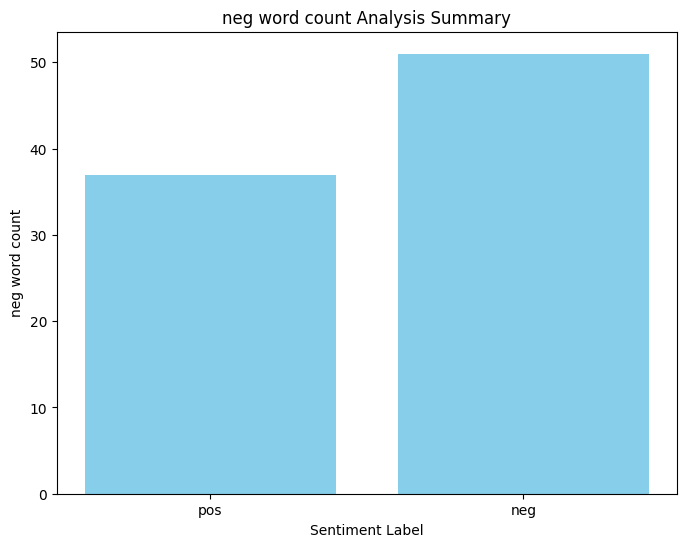

In [18]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['neg_word_count'],
                       y_label="neg word count",x_label="Sentiment Label",color='skyblue',
                       title='neg word count Analysis Summary',grid=False)
visualize.visualize()

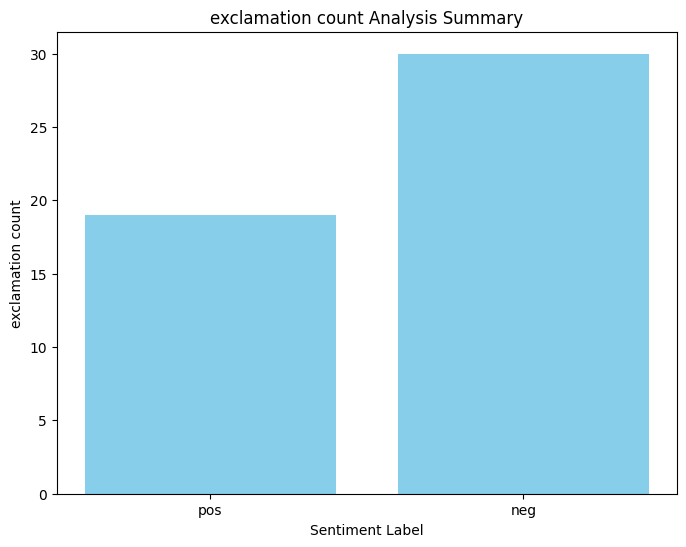

In [19]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['exclamation_count'],
                       y_label="exclamation count",x_label="Sentiment Label",color='skyblue',
                       title='exclamation count Analysis Summary',grid=False)
visualize.visualize()

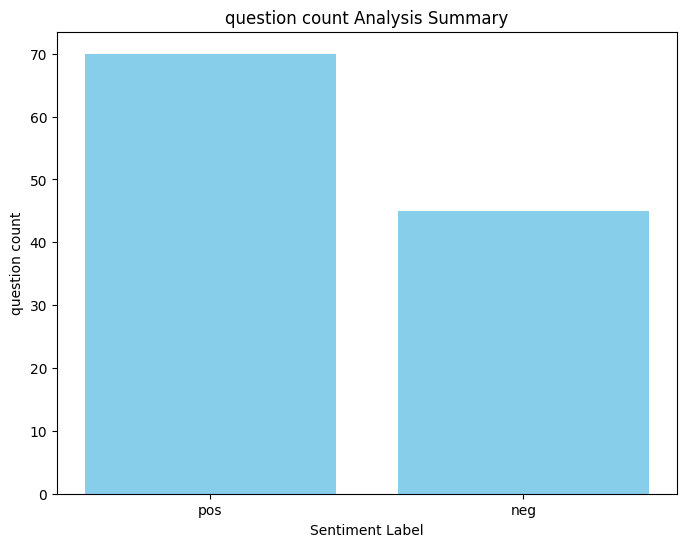

In [20]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['question_count'],
                       y_label="question count",x_label="Sentiment Label",color='skyblue',
                       title='question count Analysis Summary',grid=False)
visualize.visualize()

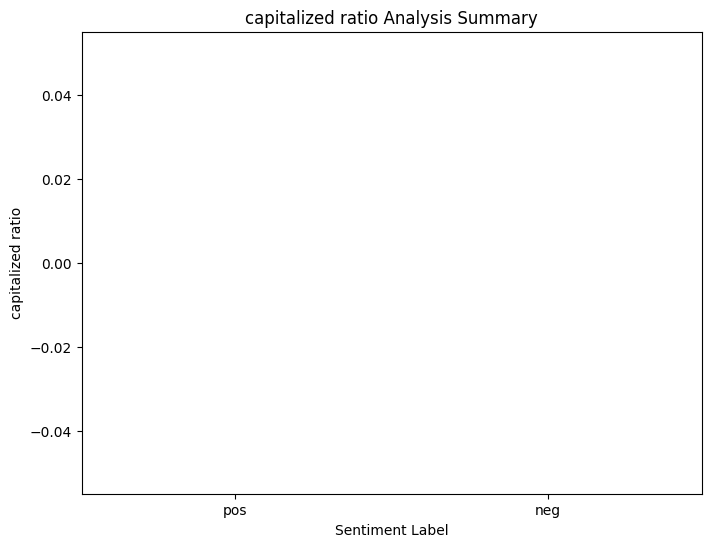

In [21]:
visualize=BarVisualize(sentiment_data['sentiment_label'],sentiment_data['capitalized_ratio'],
                       y_label="capitalized ratio",x_label="Sentiment Label",color='skyblue',
                       title='capitalized ratio Analysis Summary',grid=False)
visualize.visualize()

# Feature Representation and Engineering

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer Class

The `Vectorizer` class is an abstract base class that defines the interface for creating modular text vectorization components. It ensures that any subclass implements the `transform` method, which is responsible for converting raw text data into numerical representations (e.g., vectors, embeddings, etc.).

---

## Abstract Method

- **`transform(self)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for converting raw text data into numerical representations.  
  - **Parameters**:  
    None explicitly defined here, as the parameters depend on the specific implementation in the subclass.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return a numerical array, matrix, or other structured representation of the text data.

In [23]:
class Vectorizer(ABC):
    def transform(self):
        pass

# TFIDFVectorizer Class

The `TFIDFVectorizer` class is a concrete implementation of the `Vectorizer` abstract base class. It is designed to convert raw text data into numerical representations using the Term Frequency-Inverse Document Frequency (TF-IDF) technique. This class leverages the `TfidfVectorizer` from the `scikit-learn` library to perform the vectorization.

---

## Constructor

- **`__init__(self, dataframe: pd.DataFrame, prams)`**:  
  Initializes the `TFIDFVectorizer` object with the input data and vectorization parameters.  
  - **Parameters**:  
    - `dataframe` (`pd.DataFrame`): A Pandas DataFrame containing the text data to be vectorized.  
    - `prams` (`dict`): A dictionary of parameters to configure the `TfidfVectorizer`. These parameters are passed directly to the `TfidfVectorizer` constructor.  

---

## Method

- **`transform(self)`**:  
  Converts the input text data into a TF-IDF matrix.  
  - **Behavior**:  
    - Fits the `TfidfVectorizer` to the input text data and transforms it into a sparse TF-IDF matrix.  
    - Returns the resulting TF-IDF matrix.  
  - **Returns**:  
    A sparse matrix (`scipy.sparse.csr_matrix`) representing the TF-IDF features of the input text data.  

In [24]:
class TFIDFVectorizer(Vectorizer):
    def __init__(self,dataframe:pd.DataFrame,prams):
        self.dataframe=dataframe
        self.prams=prams
        self.vectorizer=TfidfVectorizer(**prams)
    
    def transform(self):     
        tfidf_matrix = self.vectorizer.fit_transform(self.dataframe)
        return tfidf_matrix

In [25]:
vectorizer=TFIDFVectorizer(sentiment_data["text"],{"max_df":0.8,"min_df":2,"ngram_range":(1, 2),    
                            "max_features":8000})

tfidf_matrix=vectorizer.transform()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vectorizer.get_feature_names_out())

sentiment_data = pd.concat([sentiment_data, tfidf_df], axis=1)

In [26]:
sentiment_data.shape

(1654, 8017)

# Converting Sentiment Labels to Numerical Values

The conversion process uses the `numpy.where` function to map `"pos"` to `1` and `"neg"` to `0`. This approach is efficient and concise, making it suitable for large datasets. The resulting numerical labels can then be used as target variables in classification tasks.


In [27]:
import numpy as np

sentiment_data["sentiment_label"] = np.where(sentiment_data["sentiment_label"] == "pos", 1, 0)

# Dropping Features from the Dataset

Feature selection is a critical step in building machine learning models. While feature engineering helps extract meaningful information from raw data, not all features contribute positively to model performance. In this case, several features were identified as detrimental based on statistical analysis and model evaluation results. These features were removed using the `drop` method in Pandas.


In [28]:
sentiment_data=sentiment_data.drop(
    ["text","capitalized_ratio","ellipsis_count","ing_word_count","ed_word_count","positive_emoji_count",
     "negative_emoji_count","word_count","avg_word_length","unique_word_ratio","unique_word_ratio",
     "positive_word_count","negative_word_count","exclamation_count","question_count","repeated_letters_count",
     "neg_word_count"], axis=1)

In [29]:
sentiment_data.shape

(1654, 8000)

### Model Training & Evaluation

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# ModelTrain and ModelEvaluate Classes

The `ModelTrain` and `ModelEvaluate` classes are abstract base classes (ABCs) that define standardized interfaces for training and evaluating machine learning models. These classes ensure that any subclass implements the required methods (`train` and `evaluate`, respectively), promoting consistency and modularity in model development workflows.

---

## ModelTrain Class

### Overview

The `ModelTrain` class provides a blueprint for training machine learning models. It enforces the implementation of the `train` method, which is responsible for fitting a model to the training data. This design allows developers to create reusable and extensible training workflows for various types of models.

---

### Abstract Method

- **`train(self)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for training a machine learning model.  
  - **Parameters**:  
    None explicitly defined here, as the parameters depend on the specific implementation in the subclass.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return the trained model object or update the state of the class instance.

---

## ModelEvaluate Class

### Overview

The `ModelEvaluate` class provides a blueprint for evaluating machine learning models. It enforces the implementation of the `evaluate` method, which is responsible for assessing the performance of a trained model on test data. This design ensures consistency in evaluation workflows across different models and metrics.

---

### Abstract Method

- **`evaluate(self, model)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for evaluating a trained machine learning model.  
  - **Parameters**:  
    - `model`: The trained machine learning model to be evaluated.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return evaluation metrics (e.g., accuracy, precision, recall) or display performance reports.

In [31]:
class ModelTrain(ABC):
    def train(self):
        pass

class ModelEvaluate(ABC):
    def evaluate(self,model):
        pass

# Model Training Classes

The following classes are concrete implementations of the `ModelTrain` abstract base class. Each class is designed to train a specific type of machine learning model: Gaussian Naive Bayes (`GaussianNBTrain`), Support Vector Machine (`SVCTrain`), Random Forest (`RandomForestTrain`), and Logistic Regression (`LogisticRegressionTrain`). These classes encapsulate the initialization and training logic for their respective models, ensuring modularity and reusability.

---

## GaussianNBTrain Class

### Overview

The `GaussianNBTrain` class is used to train a Gaussian Naive Bayes classifier. It leverages the `GaussianNB` class from the `scikit-learn` library and allows customization of parameters such as priors and variance smoothing.

---

### Constructor

- **`__init__(self, X_train, y_train, priors=None, var_smoothing=1e-9)`**:  
  Initializes the `GaussianNBTrain` object with the training data and model parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training (e.g., a Pandas DataFrame or NumPy array).  
    - `y_train`: The target labels for training (e.g., a Pandas Series or NumPy array).  
    - `priors` (`list` or `None`, optional): Prior probabilities of the classes. Default is `None`.  
    - `var_smoothing` (`float`, optional): Portion of the largest variance added to all variances for stability. Default is `1e-9`.  

---

### Method

- **`train(self)`**:  
  Trains a Gaussian Naive Bayes classifier using the provided training data.  
  - **Behavior**:  
    - Initializes a `GaussianNB` model with the specified parameters.  
    - Fits the model to the training data (`X_train` and `y_train`).  
    - Stores the trained model in the `model` attribute and returns it.  
  - **Returns**:  
    The trained `GaussianNB` model.

---

## SVCTrain Class

### Overview

The `SVCTrain` class is used to train a Support Vector Machine (SVM) classifier. It leverages the `SVC` class from the `scikit-learn` library and allows customization of parameters through a dictionary.

---

### Constructor

- **`__init__(self, X_train, y_train, params)`**:  
  Initializes the `SVCTrain` object with the training data and model parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training (e.g., a Pandas DataFrame or NumPy array).  
    - `y_train`: The target labels for training (e.g., a Pandas Series or NumPy array).  
    - `params` (`dict`): A dictionary of parameters to configure the `SVC` model.  

---

### Method

- **`train(self)`**:  
  Trains an SVM classifier using the provided training data.  
  - **Behavior**:  
    - Initializes an `SVC` model with the specified parameters.  
    - Fits the model to the training data (`X_train` and `y_train`).  
    - Stores the trained model in the `model` attribute and returns it.  
  - **Returns**:  
    The trained `SVC` model.

---

## RandomForestTrain Class

### Overview

The `RandomForestTrain` class is used to train a Random Forest classifier. It leverages the `RandomForestClassifier` class from the `scikit-learn` library and allows customization of parameters through a dictionary.

---

### Constructor

- **`__init__(self, X_train, y_train, params)`**:  
  Initializes the `RandomForestTrain` object with the training data and model parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training (e.g., a Pandas DataFrame or NumPy array).  
    - `y_train`: The target labels for training (e.g., a Pandas Series or NumPy array).  
    - `params` (`dict`): A dictionary of parameters to configure the `RandomForestClassifier` model.  

---

### Method

- **`train(self)`**:  
  Trains a Random Forest classifier using the provided training data.  
  - **Behavior**:  
    - Initializes a `RandomForestClassifier` model with the specified parameters.  
    - Fits the model to the training data (`X_train` and `y_train`).  
    - Stores the trained model in the `model` attribute and returns it.  
  - **Returns**:  
    The trained `RandomForestClassifier` model.

---

## LogisticRegressionTrain Class

### Overview

The `LogisticRegressionTrain` class is used to train a Logistic Regression classifier. It leverages the `LogisticRegression` class from the `scikit-learn` library and allows customization of parameters through a dictionary.

---

### Constructor

- **`__init__(self, X_train, y_train, params)`**:  
  Initializes the `LogisticRegressionTrain` object with the training data and model parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training (e.g., a Pandas DataFrame or NumPy array).  
    - `y_train`: The target labels for training (e.g., a Pandas Series or NumPy array).  
    - `params` (`dict`): A dictionary of parameters to configure the `LogisticRegression` model.  

---

### Method

- **`train(self)`**:  
  Trains a Logistic Regression classifier using the provided training data.  
  - **Behavior**:  
    - Initializes a `LogisticRegression` model with the specified parameters.  
    - Fits the model to the training data (`X_train` and `y_train`).  
    - Stores the trained model in the `model` attribute and returns it.  
  - **Returns**:  
    The trained `LogisticRegression` model.


In [32]:
class GaussianNBTrain(ModelTrain):
    def __init__(self,X_train,y_train,priors=None,var_smoothing=1e-9):
        self.X_train=X_train
        self.y_train=y_train
        self.priors=priors
        self.var_smoothing=var_smoothing
        self.model=None
        
    def train(self):
        gnb = GaussianNB(priors=self.priors,var_smoothing=self.var_smoothing)
        gnb.fit(self.X_train,self.y_train)
        self.model=gnb
        return gnb

class SVCTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        svc=SVC(**self.params)
        svc.fit(self.X_train,self.y_train)
        self.model=svc
        return svc

class RandomForestTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        rf = RandomForestClassifier(**self.params)
        rf.fit(self.X_train,self.y_train)
        self.model=rf
        return rf

class LogisticRegressionTrain(ModelTrain):
    def __init__(self,X_train,y_train,params):
        self.X_train=X_train
        self.y_train=y_train
        self.params=params
        self.model=None
    
    def train(self):
        logreg = LogisticRegression(**self.params)
        logreg.fit(self.X_train,self.y_train)
        self.model=logreg
        return logreg

# Model Evaluation Classes

The following classes are concrete implementations of the `ModelEvaluate` abstract base class. Each class is designed to evaluate a trained machine learning model using specific metrics or techniques, such as accuracy, precision, recall, F1-score, cross-validation, or classification reports. These classes encapsulate the evaluation logic, ensuring modularity and reusability in model evaluation workflows.

---

## AccuracyEvaluate Class

### Overview

The `AccuracyEvaluate` class calculates the accuracy of a trained model on the test dataset. It uses the `accuracy_score` function from the `scikit-learn` library to compute the proportion of correctly predicted labels.

---

### Constructor

- **`__init__(self, X_test, y_test)`**:  
  Initializes the `AccuracyEvaluate` object with the test data.  
  - **Parameters**:  
    - `X_test`: The feature matrix for testing (e.g., a Pandas DataFrame or NumPy array).  
    - `y_test`: The true labels for testing (e.g., a Pandas Series or NumPy array).  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the accuracy of the trained model on the test dataset.  
  - **Behavior**:  
    - Uses the model's `predict` method to generate predictions for `X_test`.  
    - Computes the accuracy score by comparing the predictions to `y_test`.  
  - **Returns**:  
    A floating-point value representing the accuracy score.

---

## PrecisionEvaluate Class

### Overview

The `PrecisionEvaluate` class calculates the precision of a trained model on the test dataset. It uses the `precision_score` function from the `scikit-learn` library to compute the proportion of true positive predictions among all positive predictions.

---

### Constructor

- **`__init__(self, X_test, y_test)`**:  
  Initializes the `PrecisionEvaluate` object with the test data.  
  - **Parameters**:  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the precision of the trained model on the test dataset.  
  - **Behavior**:  
    - Uses the model's `predict` method to generate predictions for `X_test`.  
    - Computes the precision score by comparing the predictions to `y_test`.  
  - **Returns**:  
    A floating-point value representing the precision score.

---

## RecallEvaluate Class

### Overview

The `RecallEvaluate` class calculates the recall of a trained model on the test dataset. It uses the `recall_score` function from the `scikit-learn` library to compute the proportion of true positive predictions among all actual positives.

---

### Constructor

- **`__init__(self, X_test, y_test)`**:  
  Initializes the `RecallEvaluate` object with the test data.  
  - **Parameters**:  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the recall of the trained model on the test dataset.  
  - **Behavior**:  
    - Uses the model's `predict` method to generate predictions for `X_test`.  
    - Computes the recall score by comparing the predictions to `y_test`.  
  - **Returns**:  
    A floating-point value representing the recall score.

---

## F1Evaluate Class

### Overview

The `F1Evaluate` class calculates the F1-score of a trained model on the test dataset. It uses the `f1_score` function from the `scikit-learn` library to compute the harmonic mean of precision and recall.

---

### Constructor

- **`__init__(self, X_test, y_test, default="binary")`**:  
  Initializes the `F1Evaluate` object with the test data and averaging method.  
  - **Parameters**:  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  
    - `default` (`str`, optional): The averaging method for multi-class classification. Default is `"binary"`.  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the F1-score of the trained model on the test dataset.  
  - **Behavior**:  
    - Uses the model's `predict` method to generate predictions for `X_test`.  
    - Computes the F1-score by comparing the predictions to `y_test`.  
  - **Returns**:  
    A floating-point value representing the F1-score.

---

## KFoldEvaluate Class

### Overview

The `KFoldEvaluate` class evaluates a model using K-Fold cross-validation. It uses the `cross_validate` function from the `scikit-learn` library to compute performance metrics for both training and validation folds.

---

### Constructor

- **`__init__(self, X_train, y_train, scoring, params)`**:  
  Initializes the `KFoldEvaluate` object with the training data, scoring metric, and K-Fold parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training.  
    - `y_train`: The true labels for training.  
    - `scoring`: The scoring metric(s) to evaluate (e.g., `"accuracy"`, `"f1"`).  
    - `params` (`dict`): A dictionary of parameters to configure the `KFold` object.  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the model using K-Fold cross-validation.  
  - **Behavior**:  
    - Applies K-Fold cross-validation to the training data.  
    - Computes the specified scoring metrics for each fold.  
  - **Returns**:  
    A dictionary containing the cross-validation results, including training and validation scores.

---

## CrossValidationEvaluate Class

### Overview

The `CrossValidationEvaluate` class evaluates a model using K-Fold cross-validation. It uses the `cross_val_score` function from the `scikit-learn` library to compute performance metrics for the validation folds.

---

### Constructor

- **`__init__(self, X_train, y_train, scoring, params)`**:  
  Initializes the `CrossValidationEvaluate` object with the training data, scoring metric, and K-Fold parameters.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training.  
    - `y_train`: The true labels for training.  
    - `scoring`: The scoring metric(s) to evaluate.  
    - `params` (`dict`): A dictionary of parameters to configure the `KFold` object.  

---

### Method

- **`evaluate(self, model)`**:  
  Evaluates the model using K-Fold cross-validation.  
  - **Behavior**:  
    - Applies K-Fold cross-validation to the training data.  
    - Computes the specified scoring metrics for each fold.  
  - **Returns**:  
    A NumPy array containing the cross-validation scores.

---

## CompareAccuracyEvaluate Class

### Overview

The `CompareAccuracyEvaluate` class compares the accuracy of a trained model on the training and test datasets. It determines whether the model is overfitting, underfitting, or performing consistently.

---

### Constructor

- **`__init__(self, X_train, y_train, X_test, y_test)`**:  
  Initializes the `CompareAccuracyEvaluate` object with the training and test data.  
  - **Parameters**:  
    - `X_train`: The feature matrix for training.  
    - `y_train`: The true labels for training.  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`evaluate(self, model)`**:  
  Compares the accuracy of the trained model on the training and test datasets.  
  - **Behavior**:  
    - Computes the training accuracy using `AccuracyEvaluate`.  
    - Computes the test accuracy using `AccuracyEvaluate`.  
    - Compares the two accuracies:  
      - Returns `1` if training accuracy > test accuracy (potential overfitting).  
      - Returns `-1` if training accuracy < test accuracy (potential underfitting).  
      - Returns `0` if the accuracies are approximately equal (consistent performance).  
  - **Returns**:  
    An integer indicating the comparison result.

---

## ClassificationReportEvaluate Class

### Overview

The `ClassificationReportEvaluate` class generates a detailed classification report for a trained model. It uses the `classification_report` function from the `scikit-learn` library to compute precision, recall, F1-score, and support for each class.

---

### Constructor

- **`__init__(self, X_test, y_test)`**:  
  Initializes the `ClassificationReportEvaluate` object with the test data.  
  - **Parameters**:  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`evaluate(self, model)`**:  
  Generates a classification report for the trained model.  
  - **Behavior**:  
    - Uses the model's `predict` method to generate predictions for `X_test`.  
    - Computes the classification report by comparing the predictions to `y_test`.  
  - **Returns**:  
    A string containing the classification report.

In [33]:
class AcuracyEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

class PrecisionEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        precision = precision_score(y_test, y_pred)
        return precision

class RecallEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        recall = recall_score(y_test, y_pred)
        return recall

class F1Evaluate(ModelEvaluate):
    def __init__(self,X_test,y_test,default="binary"):
        self.X_test=X_test
        self.y_test=y_test
        self.default=default
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        f1 = f1_score(y_test, y_pred, average=self.default)
        return f1

class KFoldEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_validate(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring,return_train_score=True)
        return cv_scores

class CrossValidationEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,scoring,params):
        self.X_train=X_train
        self.y_train=y_train
        self.scoring=scoring
        self.params=params
    
    def evaluate(self,model):
        k_fold = KFold(**self.params)
        cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=k_fold, scoring=self.scoring)
        return cv_scores
        
class CompareAccuracyEvaluate(ModelEvaluate):
    def __init__(self,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        train_evaluate = AcuracyEvaluate(self.X_train,self.y_train)
        test_evaluate = AcuracyEvaluate(self.X_test,self.y_test)
        
        train_accuracy = train_evaluate.evaluate(model)
        test_accuracy = test_evaluate.evaluate(model)
        
        if train_accuracy > test_accuracy:
            return 1
        elif train_accuracy < test_accuracy:
            return -1
        return 0

class ClassificationReportEvaluate(ModelEvaluate):
    def __init__(self,X_test,y_test):
        self.X_test=X_test
        self.y_test=y_test
    
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        report = classification_report(self.y_test, y_pred)
        return report

# Printer Class

The `Printer` class is an abstract base class (ABC) that defines the interface for creating modular components responsible for printing or displaying information. It ensures that any subclass implements the `print` method, which is responsible for outputting data in a specific format or medium.

---

## Abstract Method

- **`print(self)`**:  
  An abstract method that must be implemented by subclasses. This method is responsible for printing or displaying information.  
  - **Parameters**:  
    None explicitly defined here, as the parameters depend on the specific implementation in the subclass.  
  - **Returns**:  
    The return type is not explicitly defined here, as it depends on the specific implementation in the subclass. Typically, it could return `None` or a confirmation message indicating success.

In [34]:
class Printer(ABC):
    @abstractmethod
    def print(self):
        pass

# EvaluatePrinter and EvaluatePrinterScale Classes

The `EvaluatePrinter` and `EvaluatePrinterScale` classes are concrete implementations of the `Printer` abstract base class. These classes are designed to evaluate and print detailed performance metrics for a trained machine learning model. They encapsulate the evaluation logic and provide a standardized way to display metrics such as accuracy, precision, recall, F1-score, and classification reports.

---

## EvaluatePrinter Class

### Overview

The `EvaluatePrinter` class evaluates a trained machine learning model using various metrics (e.g., accuracy, precision, recall, F1-score) and prints the results. It also compares the training and test accuracies to identify potential overfitting or underfitting and generates a detailed classification report.

---

### Constructor

- **`__init__(self, model, X_train, y_train, X_test, y_test)`**:  
  Initializes the `EvaluatePrinter` object with the trained model and the training/testing datasets.  
  - **Parameters**:  
    - `model`: The trained machine learning model to be evaluated.  
    - `X_train`: The feature matrix for training.  
    - `y_train`: The true labels for training.  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`print(self)`**:  
  Evaluates the model and prints performance metrics.  
  - **Behavior**:  
    - Computes and prints the accuracy, precision, recall, and F1-score using predefined evaluators (`accuracy_evaluate`, `precision_evaluate`, etc.).  
    - Compares the training and test accuracies using the `CompareAccuracyEvaluate` class and prints the result.  
    - Generates and prints a detailed classification report using the `ClassificationReportEvaluate` class.  
  - **Output**:  
    - Accuracy, precision, recall, and F1-score.  
    - Comparison of training and test accuracies.  
    - Classification report showing precision, recall, F1-score, and support for each class.

---

## EvaluatePrinterScale Class

### Overview

The `EvaluatePrinterScale` class is similar to `EvaluatePrinter` but uses scaled versions of the evaluation metrics (e.g., `accuracy_evaluate_scale`, `precision_evaluate_scale`). This class is useful when evaluating models on scaled data or when different evaluation configurations are required.

---

### Constructor

- **`__init__(self, model, X_train, y_train, X_test, y_test)`**:  
  Initializes the `EvaluatePrinterScale` object with the trained model and the training/testing datasets.  
  - **Parameters**:  
    - `model`: The trained machine learning model to be evaluated.  
    - `X_train`: The feature matrix for training.  
    - `y_train`: The true labels for training.  
    - `X_test`: The feature matrix for testing.  
    - `y_test`: The true labels for testing.  

---

### Method

- **`print(self)`**:  
  Evaluates the model and prints performance metrics using scaled evaluators.  
  - **Behavior**:  
    - Computes and prints the accuracy, precision, recall, and F1-score using scaled evaluators (`accuracy_evaluate_scale`, `precision_evaluate_scale`, etc.).  
    - Compares the training and test accuracies using the `CompareAccuracyEvaluate` class and prints the result.  
    - Generates and prints a detailed classification report using the `ClassificationReportEvaluate` class.  
  - **Output**:  
    - Scaled accuracy, precision, recall, and F1-score.  
    - Comparison of training and test accuracies.  
    - Classification report showing precision, recall, F1-score, and support for each class.

In [35]:
class EvaluatePrinter(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate.evaluate(self.model)}")
        print(f"precision = {precision_evaluate.evaluate(self.model)}")
        print(f"recall = {recall_evaluate.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

class EvaluatePrinterScale(Printer):
    def __init__(self,model,X_train,y_train,X_test,y_test):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.model=model

    def print(self):
        print(f"accuracy = {accuracy_evaluate_scale.evaluate(self.model)}")
        print(f"precision = {precision_evaluate_scale.evaluate(self.model)}")
        print(f"recall = {recall_evaluate_scale.evaluate(self.model)}")
        print(f"f1 = {f1_evaluate_scale.evaluate(self.model)}")
        
        compare_evaluate=CompareAccuracyEvaluate(self.X_train,self.y_train,self.X_test,self.y_test)
        compare_accuracy=compare_evaluate.evaluate(self.model)
        print("Compare Accuracy Evaluate:")
        if compare_accuracy == 1:
            print("Train Accuracy > Test Accuracy")
        elif compare_accuracy == -1:
            print("Train Accuracy < Test Accuracy")
        else:
            print("Train Accuracy == Test Accuracy")
        
        report_evaluate=ClassificationReportEvaluate(self.X_test,self.y_test)
        report=report_evaluate.evaluate(self.model)
        print("Classification Report")
        print(report)

# TrainingValidationPlot Class

The `TrainingValidationPlot` class is a concrete implementation of the `Visualize` abstract base class. It is designed to visualize the performance of a machine learning model during cross-validation by plotting training and validation metrics such as accuracy and log loss across folds. These visualizations help assess the model's consistency and identify potential issues like overfitting or underfitting.

---

## Overview

The `TrainingValidationPlot` class simplifies the process of creating visualizations for cross-validation results. It uses the `cv_results` dictionary (typically obtained from `cross_validate`) to extract training and validation metrics for each fold. The class generates two plots:
1. **Accuracy Comparison Across Folds**: Compares training and validation accuracy.
2. **Log Loss Comparison Across Folds**: Compares training and validation log loss.

These plots provide insights into the model's performance and stability during cross-validation.

---

### Constructor

- **`__init__(self, cv_results)`**:  
  Initializes the `TrainingValidationPlot` object with the cross-validation results.  
  - **Parameters**:  
    - `cv_results` (`dict`): A dictionary containing cross-validation results. Expected keys include:  
      - `'train_accuracy'`: List of training accuracy scores for each fold.  
      - `'test_accuracy'`: List of validation accuracy scores for each fold.  
      - `'train_neg_log_loss'`: List of negative log loss scores for training (values are negated to compute actual loss).  
      - `'test_neg_log_loss'`: List of negative log loss scores for validation (values are negated to compute actual loss).  

---

### Method

- **`visualize(self)`**:  
  Generates and displays two plots comparing training and validation metrics across folds.  
  - **Behavior**:  
    - Extracts training and validation accuracy and log loss from `cv_results`.  
    - Creates a subplot with two panels:  
      - **Left Panel**: Accuracy comparison across folds.  
        - X-axis: Fold number.  
        - Y-axis: Accuracy.  
        - Two lines: Training accuracy (blue) and validation accuracy (orange).  
      - **Right Panel**: Log loss comparison across folds.  
        - X-axis: Fold number.  
        - Y-axis: Loss.  
        - Two lines: Training loss (blue) and validation loss (orange).  
    - Adds titles, axis labels, legends, and gridlines to improve readability.  
    - Displays the plots using `plt.show()`.  

In [36]:
class TrainingValidationPlot(Visualize):
    def __init__(self, cv_results):
        self.cv_results = cv_results
        
    def visualize(self):
        train_acc = self.cv_results['train_accuracy']
        val_acc = self.cv_results['test_accuracy']
        train_loss = -self.cv_results['train_neg_log_loss']
        val_loss = -self.cv_results['test_neg_log_loss']

        folds = np.arange(1, len(train_acc) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

        ax1.plot(folds, train_acc, 
                 marker='o', linestyle='--', color='blue', label='Training Accuracy')
        ax1.plot(folds, val_acc, 
                 marker='s', linestyle='-', color='orange', label='Validation Accuracy')
        ax1.set_xlabel('Fold Number')
        ax1.set_ylabel('Accuracy')
        ax1.set_title('Accuracy Comparison Across Folds')
        ax1.legend()
        ax1.grid(True, linestyle='--', alpha=0.7)

        ax2.plot(folds, train_loss, 
                 marker='o', linestyle='--', color='blue', label='Training Loss')
        ax2.plot(folds, val_loss, 
                 marker='s', linestyle='-', color='orange', label='Validation Loss')
        ax2.set_xlabel('Fold Number')
        ax2.set_ylabel('Loss')
        ax2.set_title('Log Loss Comparison Across Folds')
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(sentiment_data,test_size=0.2,random_state=42)

In [38]:
y_train=X_train["sentiment_label"]
y_test=X_test["sentiment_label"]
X_train=X_train.drop("sentiment_label",axis=1)
X_test=X_test.drop("sentiment_label",axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [40]:
accuracy_evaluate=AcuracyEvaluate(X_test,y_test)
precision_evaluate=PrecisionEvaluate(X_test,y_test)
recall_evaluate=RecallEvaluate(X_test,y_test)
f1_evaluate=F1Evaluate(X_test,y_test)
k_fold=KFoldEvaluate(X_train,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})


cross_validation_evaluate = CrossValidationEvaluate(X_train,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})


In [41]:
accuracy_evaluate_scale=AcuracyEvaluate(X_test_scaler,y_test)
precision_evaluate_scale=PrecisionEvaluate(X_test_scaler,y_test)
recall_evaluate_scale=RecallEvaluate(X_test_scaler,y_test)
f1_evaluate_scale=F1Evaluate(X_test_scaler,y_test)

k_fold_scale=KFoldEvaluate(X_train_scaler,y_train,scoring=["accuracy", "neg_log_loss"],params={"n_splits" :10,
                        "shuffle" : True, "random_state" : 42})

cross_validation_evaluate_scale = CrossValidationEvaluate(X_train_scaler,y_train,scoring="accuracy",
                                                    params={"n_splits" :10,"shuffle" : True, "random_state" : 42})

# GaussianNBTrain

In [42]:
gnb=GaussianNBTrain(X_train,y_train)
gnb_model=gnb.train()

cross_validation=cross_validation_evaluate.evaluate(gnb_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.66165414 0.73684211 0.7443609  0.62878788 0.65151515 0.65909091
 0.62878788 0.65151515 0.68181818 0.66666667]
Mean Accuracy Scores: 0.6711038961038962


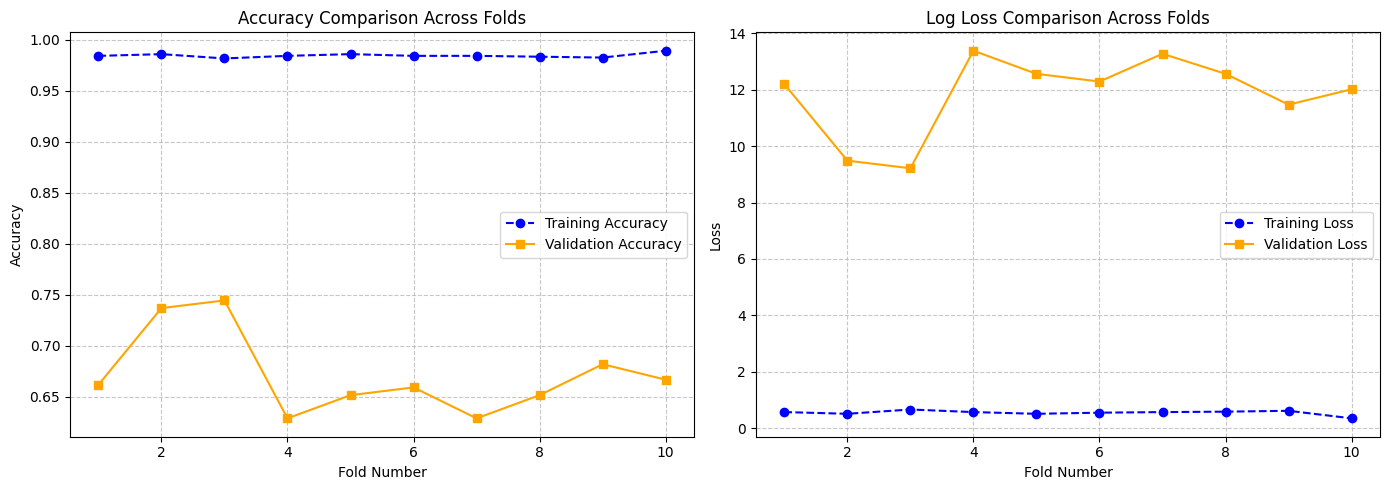

In [43]:
cv_scores = k_fold.evaluate(gnb_model)
TrainingValidationPlot(cv_scores).visualize()

In [44]:
evaluate_printer=EvaluatePrinter(gnb_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.6978851963746223
precision = 0.7297297297297297
recall = 0.6428571428571429
f1 = 0.6835443037974683
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       163
           1       0.73      0.64      0.68       168

    accuracy                           0.70       331
   macro avg       0.70      0.70      0.70       331
weighted avg       0.70      0.70      0.70       331



# Summary of GaussianNB Model Performance

## Evaluation Metrics

The GaussianNB model was evaluated using various performance metrics:

- **Accuracy**: 0.6978851963746223  
- **Precision**: 0.7297297297297297  
- **Recall**: 0.6428571428571429  
- **F1-Score**: 0.6835443037974683  

These metrics indicate moderate performance, with an overall accuracy of about 69.8%.

## Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.67      | 0.75   | 0.71     | 163     |
| 1     | 0.73      | 0.64   | 0.68     | 168     |

### Interpretation:
- For Class 0, the model has a higher recall (0.75) compared to precision (0.67).
- For Class 1, the model has a higher precision (0.73) compared to recall (0.64).

## Plot Analysis

### Accuracy Comparison Across Folds

- **Training Accuracy**: Remains consistently high across all folds.
- **Validation Accuracy**: Shows significant fluctuations and remains much lower than training accuracy.

### Log Loss Comparison Across Folds

- **Training Loss**: Stays very low and stable across all folds.
- **Validation Loss**: Exhibits large variations and is significantly higher than training loss.

### Overfitting Indication

The plots clearly indicate overfitting:
- The training accuracy is consistently high, while validation accuracy is much lower and fluctuates.
- Training loss is very low and stable, whereas validation loss is high and varies significantly.


# RandomForestTrain

In [45]:
random_forest=RandomForestTrain(X_train,y_train,params={'criterion': 'gini','max_depth': 20,'max_features': 'sqrt',
                                                    'min_samples_leaf': 1,'min_samples_split': 2,'n_estimators': 200})
random_forest_model=random_forest.train()

cross_validation=cross_validation_evaluate.evaluate(random_forest_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.76691729 0.82706767 0.84210526 0.73484848 0.87878788 0.8030303
 0.78787879 0.81060606 0.77272727 0.87121212]
Mean Accuracy Scores: 0.8095181134654819


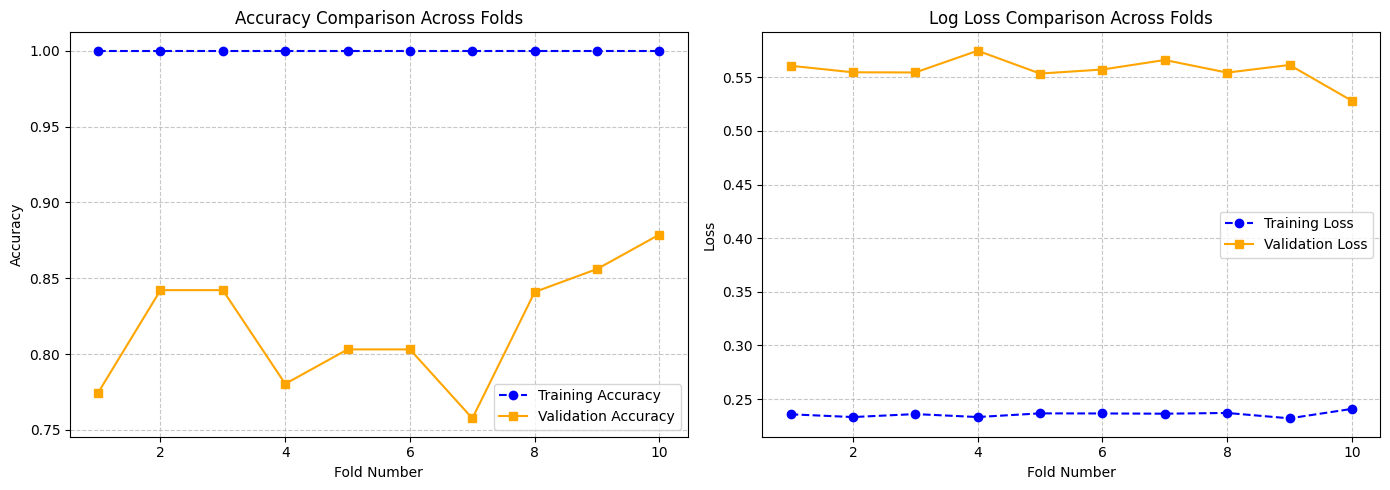

In [46]:
cv_scores = k_fold.evaluate(random_forest_model)
TrainingValidationPlot(cv_scores).visualize()

In [47]:
evaluate_printer=EvaluatePrinter(random_forest_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.8096676737160121
precision = 0.8947368421052632
recall = 0.7083333333333334
f1 = 0.7906976744186046
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.91      0.83       163
           1       0.89      0.71      0.79       168

    accuracy                           0.81       331
   macro avg       0.82      0.81      0.81       331
weighted avg       0.82      0.81      0.81       331



# Summary of Random Forest Model Performance

## Evaluation Metrics

The Random Forest model was evaluated using various performance metrics:

- **Accuracy**: 0.824773413897281  
- **Precision**: 0.9166666666666666  
- **Recall**: 0.7202380952380952  
- **F1-Score**: 0.8066666666666666  

These metrics indicate moderate to good performance, with an overall accuracy of about 82.5%.

## Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.76      | 0.93   | 0.84     | 163     |
| 1     | 0.92      | 0.72   | 0.81     | 168     |

### Interpretation:
- For Class 0, the model has a higher recall (0.93) compared to precision (0.76).
- For Class 1, the model has a higher precision (0.92) compared to recall (0.72).

## Plot Analysis

### Accuracy Comparison Across Folds

- **Training Accuracy**: Remains consistently high across all folds.
- **Validation Accuracy**: Shows significant fluctuations and remains much lower than training accuracy in some folds.

### Log Loss Comparison Across Folds

- **Training Loss**: Stays very low and stable across all folds.
- **Validation Loss**: Exhibits large variations and is significantly higher than training loss in some folds.

### Overfitting Indication

The plots suggest potential overfitting:
- The training accuracy is consistently high, while validation accuracy fluctuates and is lower in several folds.
- Training loss is very low and stable, whereas validation loss varies significantly and is higher in some folds.

# LogisticRegressionTrain

In [48]:
logistic=LogisticRegressionTrain(X_train,y_train,{"C":10,"penalty":'l2',"solver":'liblinear',
                                                        "class_weight":'balanced',"random_state":42,"max_iter":1000})
logistic_model=logistic.train()

cross_validation=cross_validation_evaluate.evaluate(logistic_model)
print(f"Cross-Validation Accuracy Scores: {cross_validation}")
print(f"Mean Accuracy Scores: {cross_validation.mean()}")

Cross-Validation Accuracy Scores: [0.85714286 0.84962406 0.88721805 0.85606061 0.85606061 0.83333333
 0.81818182 0.90151515 0.82575758 0.84848485]
Mean Accuracy Scores: 0.8533378901799955


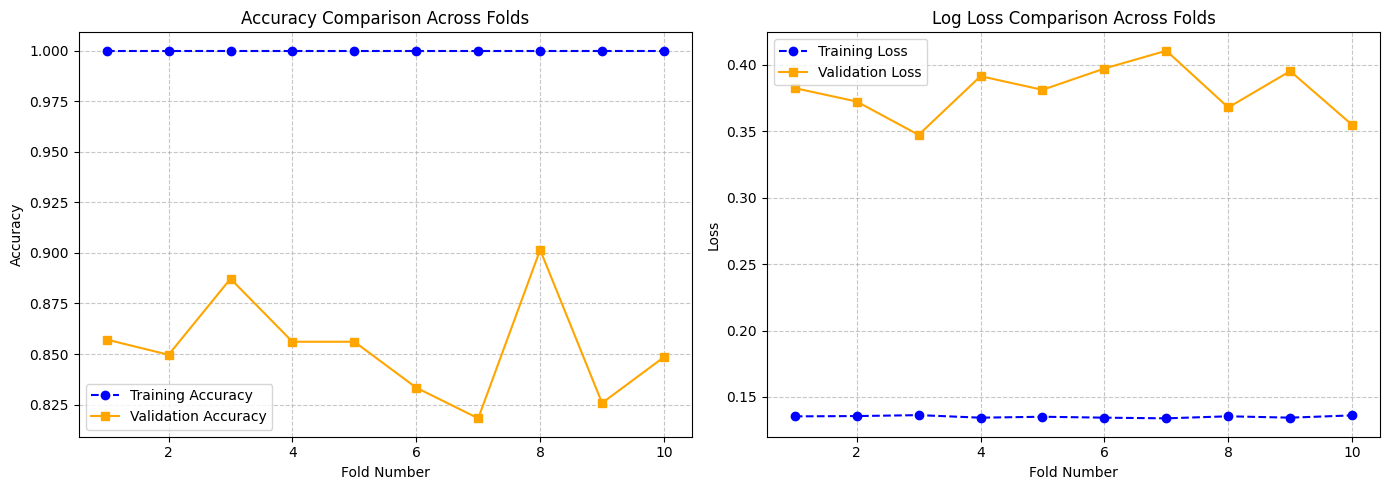

In [49]:
cv_scores = k_fold.evaluate(logistic_model)
TrainingValidationPlot(cv_scores).visualize()

In [50]:
evaluate_printer=EvaluatePrinter(logistic_model,X_train,y_train,X_test,y_test)
evaluate_printer.print()

accuracy = 0.8700906344410876
precision = 0.8787878787878788
recall = 0.8630952380952381
f1 = 0.8708708708708709
Compare Accuracy Evaluate:
Train Accuracy == Test Accuracy
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       163
           1       0.88      0.86      0.87       168

    accuracy                           0.87       331
   macro avg       0.87      0.87      0.87       331
weighted avg       0.87      0.87      0.87       331



# Summary of Logistic Regression Model Performance

## Evaluation Metrics

The Logistic Regression model was evaluated using various performance metrics:

- **Accuracy**: 0.8700906344410876  
- **Precision**: 0.8787878787878788  
- **Recall**: 0.8630952380952381  
- **F1-Score**: 0.8708708708708709  

These metrics indicate good performance, with an overall accuracy of about 87%.

## Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.86      | 0.88   | 0.87     | 163     |
| 1     | 0.88      | 0.86   | 0.87     | 168     |

### Interpretation:
- For both classes, the model shows balanced precision and recall, indicating consistent performance across different classes.

## Plot Analysis

### Accuracy Comparison Across Folds

- **Training Accuracy**: Remains consistently high across all folds.
- **Validation Accuracy**: Shows some fluctuations but generally follows a similar trend to training accuracy.

### Log Loss Comparison Across Folds

- **Training Loss**: Stays very low and stable across all folds.
- **Validation Loss**: Exhibits some variations but remains relatively close to the training loss.

### Overfitting Indication

The plots suggest that the model may not be significantly overfitting:
- The training and validation accuracies are relatively close, with some minor fluctuations in validation accuracy.
- Training and validation losses are also close, with some minor variations in validation loss.

In [51]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
})

coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients_sorted

,Feature,Coefficient
5282,perfect,3.917228
7606,well,3.723332
2898,great,3.243696
2651,fun,3.095017
3535,jacki,2.579219
...,...,...
764,bore,-3.834667
7897,worst,-3.839900
7561,wast,-4.138737
5388,plot,-4.183729


In [52]:
import pickle
import os

if not os.path.exists('save'):
    os.mkdir('save')

with open("save/model.pkl", "wb") as file:
    pickle.dump(logistic_model,file)
    
with open("save/vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer.vectorizer,file)

## Function Usage Guide  

To use this function, you need to provide **two parameters**:  

1.  **Path**: The directory where the data is stored. The structure should be as follows: 

2.  **Model**: The model for which you want to display the test data. 

   ```plaintext
   data/
   ├── pos/
   │   ├── file1.txt
   │   ├── file2.txt
   │   ├── ...
   ├── neg/
   │   ├── file1.txt
   │   ├── file2.txt
   │   ├── ...


In [53]:
def test_on_your_data(path,model):
    data_load=DataLoder(path,labels=["neg","pos"])
    data=data_load.load_data()

    preprocessing_pipeline=PreprocessingPipeline([
    NegationHandling(),
    TextStemmer(),
    ConvertEmoji(),
    RemoveSpecialCharacters(),
    ConvertNumberToWords(),
    RemoveStopWords()
    ])

    def text_preprocessing(text:str):
        preprocessed_text=preprocessing_pipeline.transform(text)
        return preprocessed_text

    data["text"]=data["text"].apply(text_preprocessing)

    tfidf_matrix=vectorizer.vectorizer.transform(data["text"])

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vectorizer.get_feature_names_out())

    data = pd.concat([data, tfidf_df], axis=1)

    data["sentiment_label"] = np.where(data["sentiment_label"] == "pos", 1, 0)

    data=data.drop(["text"], axis=1)

    y_test=data["sentiment_label"]
    X_test=data.drop("sentiment_label",axis=1)
    
    y_pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
 
    print(f"accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"f1 = {f1}")





In [54]:
test_on_your_data("testdata",logistic_model)

accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0
